<a href="https://colab.research.google.com/github/KUNALKEDARI20/Data_science_Practice/blob/main/Simple_Linear_Regression_22%2C23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np

#Import Dataset

In [ ]:
data=pd.read_csv('/content/NewspaperData.csv')
data.head()

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093


#Descriptive Statistics

In [ ]:
data

In [ ]:
data.shape

(34, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 944.0+ bytes


#Correlation

In [ ]:
data_corr= data.drop(columns=["Newspaper"]) #correlations is only applicable on numeric variable
data_corr.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


#Visualizations

In [ ]:
import seaborn as sns

<ipython-input-13-0e3f587631a0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['daily'])


<Axes: xlabel='daily', ylabel='Density'>

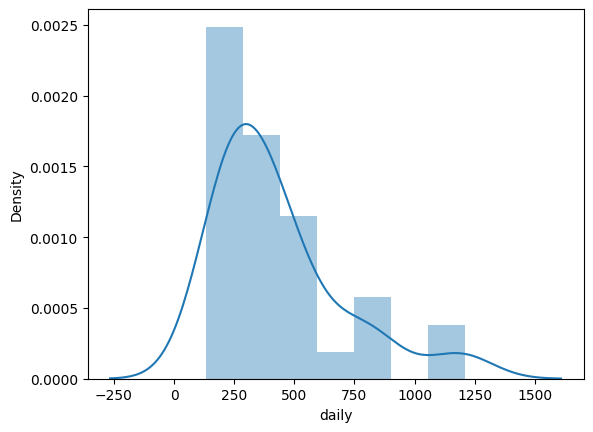

In [ ]:
sns.distplot(data['daily'])

<ipython-input-15-b7ac0e12690b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sunday'])


<Axes: xlabel='sunday', ylabel='Density'>

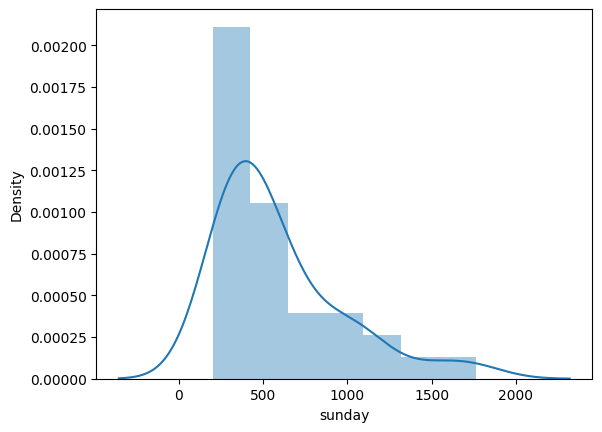

In [ ]:
sns.distplot(data['sunday'])

#Fitting Linear Regression Model

In [ ]:
import statsmodels.formula.api as smf


In [ ]:
model=smf.ols('sunday~daily',data=data).fit() #OLS-ordiniary Least Square Method,Y(dependent variable)=sunday,
                                              #X(Independent variable)=daily
model                                         #Always write Y variable first
                                              #fit()-fit the regression model

In [ ]:
model.params # Coefficents are B0 and B1
#Reg.Eqn:Sun=B0+B1*daily
#B0=Intercept(b)............y=mx+b(eqn of line)
#B1=Slope(m)

#Lets assume the daily circulation is 200 then what will be sunday criculation(yhat)
#Sunday(yhat)=B1+B0*X
#Example:Sunday=13.83+1.33*200
#So on sunday there will be 279 newspaper circulation


Intercept    13.835630
daily         1.339715
dtype: float64

In [ ]:
sun=13.83+1.33*200
sun

279.83

In [ ]:
model.rsquared,model.rsquared_adj #R-squared value=0.91 good regression model

(0.9180596895873295, 0.9154990548869336)

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 sunday   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     358.5
Date:                Fri, 17 May 2024   Prob (F-statistic):           6.02e-19
Time:                        04:16:32   Log-Likelihood:                -206.85
No. Observations:                  34   AIC:                             417.7
Df Residuals:                      32   BIC:                             420.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.8356     35.804      0.386      0.702     -59.095      86.766
daily          1.3397      0.071     18.935      0.000       1.196       1.484
==============================================================================
Omnibus:                        3.297   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                1.990
Skew:                           0.396   Prob(JB):                        0.370
Kurtosis:                       3.882   Cond. No.                         965.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#Regression Line plot

<Axes: xlabel='daily', ylabel='sunday'>

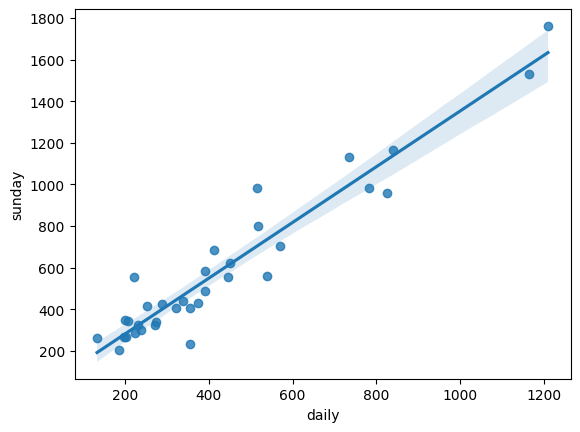

In [ ]:
sns.regplot(x='daily',y='sunday',data=data)

In [ ]:
#Along with intercept(B1)and slope(B0) other values are also calculated such as t-value and p-value
print('T-values:','\n',model.tvalues,'\n','P-values:','\n',model.pvalues)
#we have following estimates
#B1=13.83
#B0=1.33
#t-value=0.38 and 18.93
#p-value=0.7 and 0.000,so pvalue is=0
#So,define H0 and Ha :  H0-->B1=0 (No effect on x and y,no helpfull in prediction)
#                       Ha-->B1!=0(helpfull in prediction,as it have slope)
# So,here p-value is less< than Alfa(0.05)so reject H0(null hypo) and accept Ha(alternative hypo)

T-values: 
 Intercept     0.386427
daily        18.934840
dtype: float64 
 P-values: 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


#Predict for New data point

In [ ]:
#Prediction for 200 and 300 circulation (x)
new_data=pd.Series([200,300])
new_data

0    200
1    300
dtype: int64

In [ ]:
data_pred=pd.DataFrame(new_data,columns=['daily'])
data_pred

,daily
0,200
1,300


In [ ]:
pred=model.predict(data_pred)
pred

0    281.778581
1    415.750057
dtype: float64